In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_movies = pd.read_csv("/Users/josealmendarez/Documents/movielens-ven-2024-o/data/ml-latest-small/movies.csv")
df_links = pd.read_csv("/Users/josealmendarez/Documents/movielens-ven-2024-o/data/ml-latest-small/links.csv")
df_ratings = pd.read_csv("/Users/josealmendarez/Documents/movielens-ven-2024-o/data/ml-latest-small/ratings.csv")
df_tags = pd.read_csv("/Users/josealmendarez/Documents/movielens-ven-2024-o/data/ml-latest-small/tags.csv")

In [3]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### 2 Observaciones
* Podemos juntar df_movies y df_links por el movie id y recolectar la data completa de las peliculas en un solo dataframe
* Podemos hacer un cross dataframe con userid y movieid a df_movieslinks y a df_ratings

In [8]:
df_moviesandlinks = pd.merge(df_movies, df_links, on='movieId', how='inner')
#df_moviesandlinks = pd.merge(df_movies, df_tags, on='movieId', how='right')
#9742
df_moviesandlinks

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [9]:
genre_counts = df_moviesandlinks['genres'].value_counts()
print(genre_counts)
print(len(genre_counts))

genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64
951


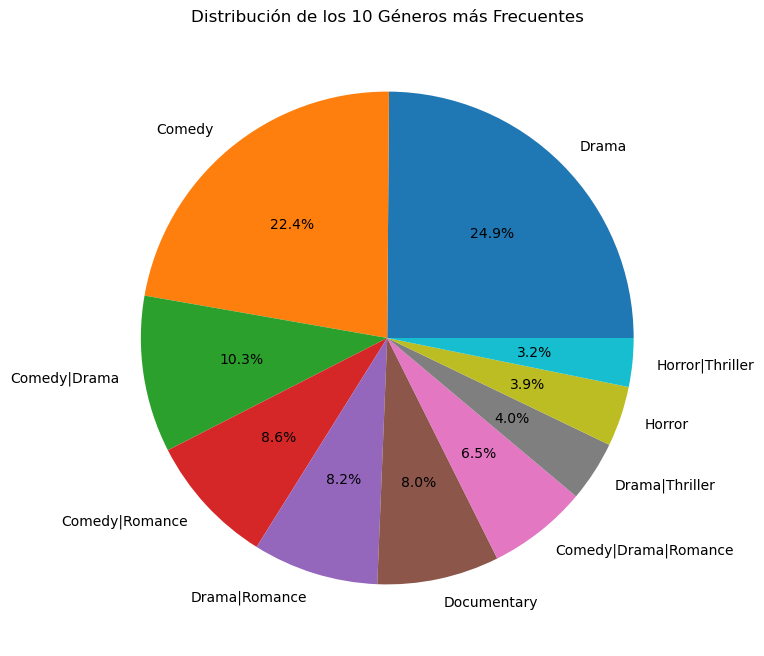

In [13]:
genre_counts = df_moviesandlinks['genres'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribución de los 10 Géneros más Frecuentes')
plt.show()

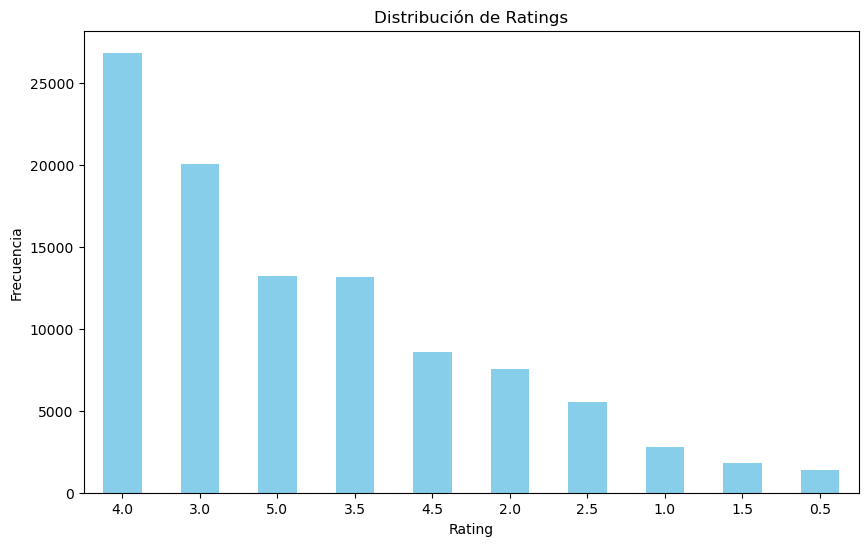

In [17]:
df_moviesandratings = pd.merge(df_movies, df_ratings, on='movieId', how='inner')
genre_counts = df_moviesandratings['rating'].value_counts()
plt.figure(figsize=(10, 6))  # Tamaño de la figura
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.show()


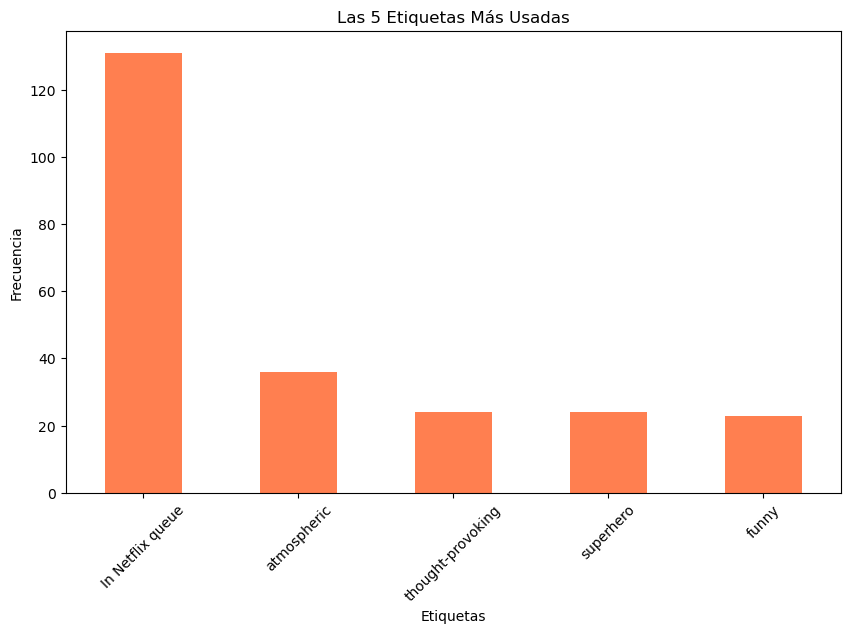

In [27]:
df_moviesandtags = pd.merge(df_movies, df_tags, on='movieId', how='inner')
# Suponiendo que df_moviesandtags es el DataFrame correcto
top_tags = df_moviesandtags['tag'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
top_tags.plot(kind='bar', color='coral')
plt.title('Las 5 Etiquetas Más Usadas')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()
